# Covid Geographic Visualizations

In [382]:
import pandas as pd
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt

#### Import Data

In [383]:
with open('covid_data.p', 'rb') as f:
    data = pickle.load(f)

#### Feature Engineering

In [384]:
def engineerFeatures(df):
    df = df[df.deaths_cdc > 0]
    df = df.dropna(subset=['lat_ea','long_ea'])
    df.lat_ea = pd.to_numeric(df.lat_ea)
    df.long_ea = pd.to_numeric(df.long_ea)
    
    df["deaths_per_100k_ave7"]=df.deaths_per_100k.rolling(window=7).mean()
    df["deaths_per_100k_ave14"]=df.deaths_per_100k.rolling(window=14).mean()
    df["deaths_per_100k_ave21"]=df.deaths_per_100k.rolling(window=21).mean()
    
    df["daily_deaths_per_100k"]=df.deaths_per_100k.diff()
    df["daily_deaths_per_100k_ave7"]=df.deaths_per_100k.diff().rolling(window=7).mean()
    df["daily_deaths_per_100k_ave14"]=df.deaths_per_100k.diff().rolling(window=14).mean()
    df["daily_deaths_per_100k_ave21"]=df.deaths_per_100k.diff().rolling(window=21).mean()
    
    df=df.dropna(subset=[
        'deaths_per_100k',
        'deaths_per_100k_ave7',
        'deaths_per_100k_ave14',
        'deaths_per_100k_ave21',
        'daily_deaths_per_100k',
        'daily_deaths_per_100k_ave7',
        'daily_deaths_per_100k_ave14',
        'daily_deaths_per_100k_ave21'      
    ])
    
    return df

In [385]:
data = engineerFeatures(data)

In [386]:
def plotMap(df, metric, dt, cmap='Reds', min_death_count = 50, scale_factor=100):
    
    df = df[df.date == dt]
    df = df[df.deaths_cdc >= min_death_count]
    df = df[df[metric] > 0]
    
    plt.figure(figsize=(20, 10))
   
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("Date: "+ str(dt))

    ax.add_feature(cfeature.LAND.with_scale('50m'), color="black", alpha=0.8)
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), color="black", alpha=0.9)
    ax.add_feature(cfeature.LAKES.with_scale('50m'), color="black", alpha=0.1)
    ax.add_feature(cfeature.STATES.with_scale('50m'))

    plt.scatter(x=df.long_ea, y=df.lat_ea, 
                c=df[metric]*scale_factor,
                cmap=cmap,
                s=df[metric]*scale_factor,
                alpha=0.3)

    ax.coastlines('50m')

    ax.set_extent([-125, -65, 25, 47])
    plt.show()

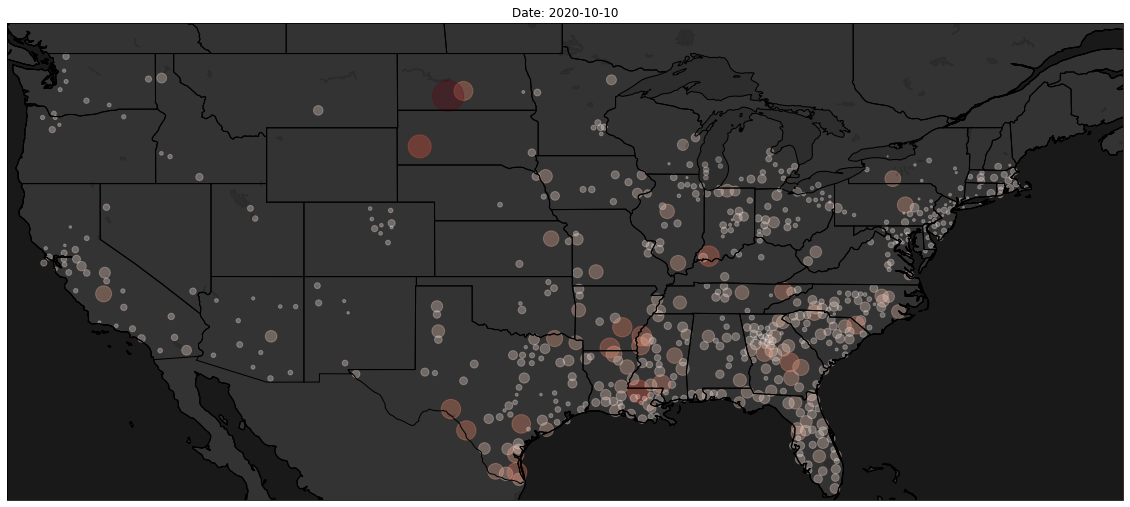

In [387]:
plotMap(data, metric='daily_deaths_per_100k_ave14', dt='2020-10-10', cmap='Reds', min_death_count=40, scale_factor=200)